In [1]:
from pyrolite.mineral import normative
from pyrolite.util.classification import TAS
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import numpy as np

2022-11-08 11:15:24,206 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed


## Load data

In [2]:
# Load data

# Load the geochemisty used as the test input to igrocs
igrocs_input = pd.read_excel('igrocs_input.xlsx')
igrocs_input_majors = pd.read_excel('igrocs_input_majors.xlsx')

# Load the geochem that has been adjusted and normalised in igrocs
igrocs_input_adj_lemaitre = pd.read_excel('igrocs_input_adj_lemaitre.xlsx')
igrocs_input_adj_middlemost = pd.read_excel('igrocs_input_adj_middlemost.xlsx')

# Load the results from igrocs (calculated using Le Maitre volcanic Fe adjustment)
igrocs_norms_lemaitre = pd.read_excel('igrocs_norms_lemaitre.xlsx')
igrocs_norms_lemaitre_majors = pd.read_excel('igrocs_norms_lemaitre_majors.xlsx')

### Calculate the norms

In [3]:
# using the Le Maitre Fe Correction
web_norms_lemaitre = normative.CIPW_norm(igrocs_input.copy(deep=True), Fe_correction='lemaitre', adjust_all_Fe=True, return_adjusted_input=True)

# using the Le Maitre Fe Correction and major oxides only
web_norms_lemaitre_majors = normative.CIPW_norm(igrocs_input_majors.copy(deep=True), Fe_correction='lemaitre', adjust_all_Fe=True, return_adjusted_input=True)

# using the Middlemost Fe Correction
web_norms_middlemost = normative.CIPW_norm(igrocs_input.copy(deep=True), Fe_correction='middlemost', adjust_all_Fe=True, return_adjusted_input=True)

In [57]:
elements = igrocs_input_adj_lemaitre.columns

rows=6
cols=5
fig = make_subplots(rows=rows, cols=cols,subplot_titles=elements, horizontal_spacing=0.075)


list_index = 0
n_plots = len(elements)

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = elements[list_index]

            pct_diff_lemaitre_filter = abs(web_norms_lemaitre[trace] - igrocs_input_adj_lemaitre[trace]) / igrocs_input_adj_lemaitre[trace] > 0.01
            
            if len(web_norms_lemaitre[trace][pct_diff_lemaitre_filter])>0:

                fig.append_trace(
                    go.Scatter(
                        x=[0,100],
                        y=[0,100],
                        line=dict(color='black')
                        ),
                    row=i,
                    col=j
                )

                fig.append_trace(
                    go.Scatter(
                        x=web_norms_lemaitre[trace][pct_diff_lemaitre_filter],
                        y=igrocs_input_adj_lemaitre[trace][pct_diff_lemaitre_filter],
                        mode='markers',
                        marker=dict(
                            color="#DB4325",
                            opacity=0.75,
                            line=dict(
                                color='#8b2a17',
                                width=1)),
                        name=trace
                        ),
                    row=i,
                    col=j
                )

                fig.append_trace(
                    go.Scatter(
                        x=web_norms_lemaitre[trace][pct_diff_lemaitre_filter==False],
                        y=igrocs_input_adj_lemaitre[trace][pct_diff_lemaitre_filter==False],
                        mode='markers',
                        marker=dict(
                            color="#57C4AD",
                            opacity=0.75,
                            line=dict(
                                color='#006164',
                                width=1)),
                        name=trace
                        ),
                    row=i,
                    col=j
                )
                
                x_max = web_norms_lemaitre[trace].max()
                y_max = igrocs_input_adj_lemaitre[trace].max()

                xy_max = max([x_max, y_max])*1.1

                fig.update_xaxes(
                    title_text="% (webNORM)",
                    title_font = {"size": 12},
                    title_standoff = 5,
                    range=[0,xy_max],
                    row=i,
                    col=j,
                    gridcolor='lightgrey',
                    linecolor='black'
                    )
                
                fig.update_yaxes(
                title_text='% (IgRoCs)',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )

            list_index +=1

fig.update_layout(height=1800, width=1300, showlegend=False, title_text="Le Maitre Fe Adjustment Comparison", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('Le Maitre Fe Adjustment Comparison.svg')

In [54]:
rows=1
cols=2

fig = make_subplots(rows=rows, cols=cols, horizontal_spacing=0.15)

list_index = 0
n_plots = 2

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = ['FeO', 'Fe2O3'][list_index]

            pct_diff_filter = abs(web_norms_lemaitre[trace] - igrocs_input_adj_lemaitre[trace]) / igrocs_input_adj_lemaitre[trace] > 0.01
            
            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                x=web_norms_lemaitre[trace][pct_diff_filter==False],
                y=igrocs_input_adj_lemaitre[trace][pct_diff_filter==False],
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1))
                ),
            row=i,
            col=j
            )
            
            fig.append_trace(
                go.Scatter(
                    x=web_norms_lemaitre[trace][pct_diff_filter],
                    y=igrocs_input_adj_middlemost[trace][pct_diff_filter],
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1))
                    ),
                row=i,
                col=j
            )

            x_max = web_norms_lemaitre[trace].fillna(0).max()
            y_max = igrocs_input_adj_middlemost[trace].fillna(0).max()

            xy_max = max([x_max, y_max])*1.1

            fig.update_xaxes(
                title_text="% {} (webNORM)".format(trace),
                title_font = {"size": 16},
                # title_standoff = 5,
                range=[0,18],
                dtick=2,
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
                title_text='% {} (IgRoCs)'.format(trace),
                title_font = {"size": 16},
                # title_standoff = 0,
                range=[0,18],
                dtick=2,
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
            )

        list_index +=1

fig.update_layout(
    {
        'yaxis1': dict(
        # scaleanchor = "x1",
        scaleratio = 1
        ),
        'yaxis2': dict(
        # scaleanchor = "x2",
        scaleratio = 1
        ),
    }
    )

fig.update_layout(showlegend=False, height=550, width=1000,plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('LeMairtreAdjustment_FeO_Fe2O3.pdf')

In [38]:
print('FeO')
print('n samples with difference > 0 =', ((abs(web_norms_lemaitre['FeO'] - igrocs_input_adj_lemaitre['FeO']).round(3)) > 0).value_counts()[True])
print('max difference =', max((abs(web_norms_lemaitre['FeO'] - igrocs_input_adj_lemaitre['FeO']).round(3))))

print('Fe2O3')
print('n samples with difference > 0 =',((abs(web_norms_lemaitre['Fe2O3'] - igrocs_input_adj_lemaitre['Fe2O3']).round(3)) > 0).value_counts()[True])
print('max difference =', max((abs(web_norms_lemaitre['Fe2O3'] - igrocs_input_adj_lemaitre['Fe2O3']).round(3))))

FeO
n samples with difference > 0 = 6
max difference = 0.001
Fe2O3
n samples with difference > 0 = 5
max difference = 0.003


In [39]:
elements = igrocs_input_adj_middlemost.columns

rows=6
cols=5
fig = make_subplots(rows=rows, cols=cols,subplot_titles=elements, horizontal_spacing=0.075)


list_index = 0
n_plots = len(elements)

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = elements[list_index]

            pct_diff_filter = abs(web_norms_middlemost[trace] - igrocs_input_adj_middlemost[trace]) / igrocs_input_adj_middlemost[trace] > 0.01

            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=web_norms_middlemost[trace][pct_diff_filter],
                    y=igrocs_input_adj_middlemost[trace][pct_diff_filter],
                    mode='markers',
                    marker=dict(
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=web_norms_middlemost[trace][pct_diff_filter==False],
                    y=igrocs_input_adj_middlemost[trace][pct_diff_filter==False],
                    mode='markers',
                    marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = web_norms_middlemost[trace].max()
            y_max = igrocs_input_adj_middlemost[trace].max()

            xy_max = max([x_max, y_max])*1.1

            fig.update_xaxes(
                title_text="% (webNORM)",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
            title_text='% (IgRoCs)',
            title_font = {"size": 12},
            title_standoff = 0,
            range=[0,xy_max],
            row=i,
            col=j,
            gridcolor='lightgrey',
            linecolor='black'
            )

        list_index +=1

fig.update_layout(height=1800, width=1300, showlegend=False, title_text="MIddle Most Fe Adjustment Comparison", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('MIddlemost Fe Adjustment Comparison.svg')

In [31]:
rows=1
cols=2

fig = make_subplots(rows=rows, cols=cols,subplot_titles=['FeO', 'Fe2O3'], horizontal_spacing=0.075)

list_index = 0
n_plots = 2

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = ['FeO', 'Fe2O3'][list_index]

            pct_diff_middlemost_filter = abs(web_norms_middlemost[trace] - igrocs_input_adj_middlemost[trace]) / igrocs_input_adj_middlemost[trace] > 0.01

            
            fig.append_trace(
                go.Scatter(
                    showlegend=False,
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j,
                
            )

            fig.append_trace(
            go.Scatter(
                showlegend=False,
                x=web_norms_middlemost[trace][pct_diff_middlemost_filter==False],
                y=igrocs_input_adj_middlemost[trace][pct_diff_middlemost_filter==False],
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=r'<1% error',
                ),
            row=i,
            col=j
            )
            
            fig.append_trace(
                go.Scatter(
                    showlegend=False,
                    x=web_norms_middlemost[trace][pct_diff_middlemost_filter],
                    y=igrocs_input_adj_middlemost[trace][pct_diff_middlemost_filter],
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=r'>1% error',
                    ),
                row=i,
                col=j
            )

            x_max = web_norms_middlemost[trace].fillna(0).max()
            y_max = igrocs_input_adj_middlemost[trace].fillna(0).max()

            xy_max = max([x_max, y_max])*1.1

            fig.update_xaxes(
                title_text="% (webNORM)",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
            title_text='% (IgRoCs)',
            title_font = {"size": 12},
            title_standoff = 0,
            range=[0,xy_max],
            row=i,
            col=j,
            gridcolor='lightgrey',
            linecolor='black'
            )

        list_index +=1

fig['data'][1].update(showlegend=True)
fig['data'][2].update(showlegend=True)


fig.update_layout(height=550, width=1000, showlegend=True, title_text="Middlemost Fe Adjustment Comparison",plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('MiddlemostAdjustment_FeO_Fe2O3.pdf')

In [21]:
fig['data'][0,1].update(showlegend=True)

TypeError: tuple indices must be integers or slices, not tuple

In [249]:
print('FeO')
print('n samples with difference > 0 =', ((abs(web_norms_middlemost['FeO'] - igrocs_input_adj_middlemost['FeO']).round(3)) > 0).value_counts()[True])
print('max difference =', max((abs(web_norms_middlemost['FeO'] - igrocs_input_adj_middlemost['FeO']).round(3))))

print('Fe2O3')
print('n samples with difference > 0 =',((abs(web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']).round(3)) > 0).value_counts()[True])
print('max difference =', max((abs(web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']).round(3))))


FeO
n samples with difference > 0 = 27
max difference = 0.675
Fe2O3
n samples with difference > 0 = 28
max difference = 0.74


In [250]:
((abs(web_norms_lemaitre['FeO'] - igrocs_input_adj_lemaitre['FeO']).round(3)) > 0).value_counts()[True]

6

In [251]:
igrocs_TAS = pd.read_excel('DataOnlyChemical_res_middlemost_minors.xls', skiprows=1)['ROCK_TAS'].values
igrocs_TAS_df = pd.DataFrame(data=[str(i).split(',')[0] for i in igrocs_TAS], columns=['TAS'])

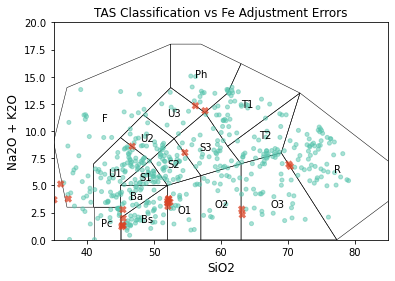

In [252]:
import pyrolite.plot
import matplotlib.pyplot as plt


filter = abs(web_norms_middlemost['Fe2O3'] - igrocs_input_adj_middlemost['Fe2O3']) / igrocs_input_adj_middlemost['Fe2O3'] > 0.01

web_norms_middlemost["Na2O + K2O"] = web_norms_middlemost[["Na2O", "K2O"]].sum(axis=1)

cm = TAS()


fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=1, linewidth=0.5, zorder=-1, add_labels=True)

web_norms_middlemost[filter==False][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#57C4AD", alpha=0.5, marker='o')

web_norms_middlemost[filter][["SiO2", "Na2O + K2O"]].pyroplot.scatter(ax=ax, c="#DB4325", marker='x', alpha=0.75, s=30, linewidths=3)

plt.title(label = 'TAS Classification vs Fe Adjustment Errors')


plt.savefig('TAS_Errors.svg')

In [253]:
norm_minerals = ['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'forsterite', 'fayalite', 'clinoferrosilite',
       'clinoenstatite', 'ferrosilite', 'enstatite', 'wollastonite',
       'cancrinite', 'halite', 'titanite']

majors=['SiO2', 'TiO2', 'Al2O3', 'Fe2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O',
       'K2O', 'P2O5']

In [254]:

major_sum_filter = igrocs_input[majors].sum(axis=1) >= 75

data=[]

data.append(
    go.Scatter(
        x=[75,75],
        y=[90,200],
        mode='lines',
        line=dict(
            dash='dash',
            color='grey'
        ),
        showlegend=False
    )
)

data.append(
    go.Scatter(
        x=igrocs_input[majors][major_sum_filter].sum(axis=1),
        y=web_norms_lemaitre[norm_minerals][major_sum_filter].sum(axis=1),
        mode='markers',
        marker=dict(
            color="#57C4AD",
            opacity=0.5,
            line=dict(
                color='#006164',
                width=1)),
        name='Major Oxides<br>Sum > 75%'
    )
)

data.append(
    go.Scatter(
        x=igrocs_input[majors][major_sum_filter==False].sum(axis=1),
        y=web_norms_lemaitre[norm_minerals][major_sum_filter==False].sum(axis=1),
        mode='markers',
        marker=dict(
            color="#DB4325",
            opacity=0.5,
            line=dict(
                color='#8b2a17',
                width=1)),
        name='Major Oxides<br>Sum < 75%'
    )
)


fig=go.Figure(data=data)

fig.update_yaxes(
            title_text='Norm Sum',
            gridcolor='lightgrey',
            linecolor='black',
            range=[95,185]
            )

fig.update_xaxes(
            title_text='Major Element Sum',
            gridcolor='white',
            linecolor='black'
            )


fig.update_layout(height=500, width=700, showlegend=True, title_text="Major Element Sum vs Normative Mineralogy Sum", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)


fig.show()
fig.write_image('Major Element Sum vs Normative Mineralogy Sum.svg')

In [255]:
igrocs_no_output_filter = igrocs_norms_lemaitre[norm_minerals].fillna(0).sum(axis=1)!=0

igrocs_majors_no_output_filter = igrocs_norms_lemaitre_majors[norm_minerals].fillna(0).sum(axis=1)!=0

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\3851555635.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\3851555635.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [256]:
web_norms_lemaitre = web_norms_lemaitre[igrocs_no_output_filter]
web_norms_lemaitre_majors = web_norms_lemaitre_majors[igrocs_majors_no_output_filter]

igrocs_norms_lemaitre = igrocs_norms_lemaitre[igrocs_no_output_filter]
igrocs_norms_lemaitre_majors = igrocs_norms_lemaitre_majors[igrocs_majors_no_output_filter]

In [257]:

rows=8
cols=5

fig = make_subplots(rows=rows, cols=cols,subplot_titles=igrocs_norms_lemaitre_majors.columns, horizontal_spacing=0.075)

list_index = 0
n_plots = len(igrocs_norms_lemaitre_majors.columns)

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = igrocs_norms_lemaitre.columns[list_index]

            pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre_majors[trace], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce') > 0.01


            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                x=pd.to_numeric(web_norms_lemaitre_majors[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                y=pd.to_numeric(igrocs_norms_lemaitre_majors[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=trace
                ),
            row=i,
            col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=pd.to_numeric(web_norms_lemaitre_majors[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    y=pd.to_numeric(igrocs_norms_lemaitre_majors[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = pd.to_numeric(web_norms_lemaitre_majors[trace], errors='coerce').max()
            y_max =  pd.to_numeric(igrocs_norms_lemaitre_majors[trace], errors='coerce').max()

            xy_max = max([x_max, y_max])*1.1

            fig.update_xaxes(
                title_text="webNORM",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
                title_text='IgRoCs',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )

        list_index +=1

fig.update_layout(height=2200, width=1300, showlegend=False, title_text="Comparison of normative mineralogy output from IgRoCs and webNORM", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('Comparison of normative mineralogy output from IgRoCs and webNORM.svg')

In [258]:
norm_minerals_endmembers = ['quartz', 'zircon', 'potassium metasilicate', 'anorthite',
       'sodium metasilicate', 'acmite', 'thenardite', 'albite', 'orthoclase',
       'perovskite', 'nepheline', 'leucite', 'dicalcium silicate',
       'kaliophilite', 'apatite', 'fluorite', 'pyrite',
       'chromite', 'ilmenite', 'calcite', 'corundum', 'rutile', 'magnetite',
       'hematite', 'olivine', 'diopside', 'hypersthene', 'wollastonite',
       'cancrinite', 'halite', 'titanite']

# mean norm sum  from webNORMS where there are diopside discrepancies
web_norms_lemaitre_majors[norm_minerals_endmembers][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1).mean()

100.0

In [259]:
# mean norm sum from igrocs where there are diopside discrepancies
igrocs_norms_lemaitre_majors[norm_minerals_endmembers][abs(web_norms_lemaitre_majors['diopside'] - igrocs_norms_lemaitre_majors['diopside'])>0.5].sum(axis=1).mean()

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\723765921.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



106.03585182549367

In [260]:
print('number of samples where norm sum is greater than +/-0.001 of 100%')
print('igrocs:', len(igrocs_norms_lemaitre_majors[abs(100-igrocs_norms_lemaitre_majors[norm_minerals_endmembers].sum(axis=1)) > 0.002]))
print('web:', len(web_norms_lemaitre_majors[abs(100-web_norms_lemaitre_majors[norm_minerals_endmembers].sum(axis=1)) > 0.002]))


number of samples where norm sum is greater than +/-0.001 of 100%
igrocs: 35
pyrolite: 4


C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\2927889048.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [261]:

rows=8
cols=5

fig = make_subplots(rows=rows, cols=cols,subplot_titles=igrocs_norms_lemaitre.columns, horizontal_spacing=0.075)

list_index = 0
n_plots = len(igrocs_norms_lemaitre.columns)

for i in range(1,rows+1):
    for j in range(1,cols+1):
        if list_index + 1 <= n_plots:
            trace = igrocs_norms_lemaitre.columns[list_index]

            pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre[trace], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce') > 0.01


            fig.append_trace(
                go.Scatter(
                    x=[0,100],
                    y=[0,100],
                    mode='lines',
                    line=dict(color='black')
                    ),
                row=i,
                col=j
            )

            fig.append_trace(
            go.Scatter(
                x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter==False], errors='coerce').fillna(0),
                mode='markers',
                marker=dict(
                        color="#57C4AD",
                        opacity=0.75,
                        line=dict(
                            color='#006164',
                            width=1)),
                name=trace
                ),
            row=i,
            col=j
            )

            fig.append_trace(
                go.Scatter(
                    x=pd.to_numeric(web_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    y=pd.to_numeric(igrocs_norms_lemaitre[trace][pct_diff_norms_filter], errors='coerce').fillna(0),
                    mode='markers',
                    marker=dict(
                        symbol='x',
                        color="#DB4325",
                        opacity=0.75,
                        line=dict(
                            color='#8b2a17',
                            width=1)),
                    name=trace
                    ),
                row=i,
                col=j
            )
            
            x_max = pd.to_numeric(web_norms_lemaitre[trace], errors='coerce').max()
            y_max =  pd.to_numeric(igrocs_norms_lemaitre[trace], errors='coerce').max()

            xy_max = max([x_max, y_max])*1.1

            fig.update_xaxes(
                title_text="webNORM",
                title_font = {"size": 12},
                title_standoff = 5,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )
            
            fig.update_yaxes(
                title_text='IgRoCs',
                title_font = {"size": 12},
                title_standoff = 0,
                range=[0,xy_max],
                row=i,
                col=j,
                gridcolor='lightgrey',
                linecolor='black'
                )

        list_index +=1

fig.update_layout(height=2200, width=1300, showlegend=False, title_text="Comparison of normative mineralogy output from IgRoCs and webNORM", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)
fig.show()
fig.write_image('Comparison of normative mineralogy output from IgRoCs and webNORM.svg')

In [262]:
print('number of samples where norm sum is greater than +/-0.001 of 100%')
print('igrocs:', len(igrocs_norms_lemaitre[abs(100-igrocs_norms_lemaitre[norm_minerals_endmembers].sum(axis=1)) > 0.002]))
print('webNORM:', len(web_norms_lemaitre[abs(100-web_norms_lemaitre[norm_minerals_endmembers].sum(axis=1)) > 0.002]))


number of samples where norm sum is greater than +/-0.001 of 100%
igrocs: 52
pyrolite: 12


C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\3672488167.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [44]:
data = []

data.append(
    go.Violin(
        x=web_norms_lemaitre[norm_minerals].sum(axis=1),
        name='webNORM',
        line_color='#57C4AD'
    )
)


data.append(
    go.Violin(
        x=igrocs_norms_lemaitre[norm_minerals].sum(axis=1),
        name='IgRoCs',
        line_color='#DB4325'

    )
)


fig=go.Figure(data=data)

fig.update_layout(height=400, width=1000, showlegend=False, title_text="Normative Sum Errors", plot_bgcolor='rgba(0,0,0,0)', title_x=0.5)

fig.update_xaxes(
                gridcolor='lightgrey',
                title='Normative Sum (%)'
                )

fig.show()
fig.write_image('Normative Sum Errors.svg')

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\73978345.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [45]:
web_norms_lemaitre[norm_minerals].sum(axis=1)[abs(100-web_norms_lemaitre[norm_minerals].sum(axis=1))>0.01].describe()

count     12.000000
mean     100.462071
std        2.039384
min       99.705938
25%       99.869174
50%       99.913126
75%       99.927272
max      106.933545
dtype: float64

In [46]:
igrocs_norms_lemaitre[norm_minerals].sum(axis=1)[abs(100-igrocs_norms_lemaitre[norm_minerals].sum(axis=1))>0.01].describe()

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\2068558015.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



count     23.000000
mean     101.562787
std        2.127512
min       99.250809
25%      100.214485
50%      101.269685
75%      101.613048
max      107.360983
dtype: float64

In [47]:
apatite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['apatite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['apatite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['apatite'], errors='coerce') > 0.01

fluorite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['fluorite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['fluorite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['fluorite'], errors='coerce') > 0.01

anorthite_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['anorthite'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['anorthite'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['anorthite'], errors='coerce') > 0.01

diopside_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['diopside'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['diopside'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['diopside'], errors='coerce') > 0.01

corundum_filter = pct_diff_norms_filter = abs(pd.to_numeric(web_norms_lemaitre['corundum'], errors='coerce') - 
            pd.to_numeric(igrocs_norms_lemaitre['corundum'], errors='coerce')) / pd.to_numeric(igrocs_norms_lemaitre['corundum'], errors='coerce') > 0.01

In [48]:
data = []

data.append(
    go.Violin(
        x=web_norms_lemaitre[fluorite_filter | apatite_filter | anorthite_filter | diopside_filter | corundum_filter][norm_minerals].sum(axis=1),
        name='webNORM',
        line_color='#57C4AD'
    )
)


data.append(
    go.Violin(
        x=igrocs_norms_lemaitre[fluorite_filter | apatite_filter | anorthite_filter | diopside_filter | corundum_filter][norm_minerals].sum(axis=1),
        name='IgRoCs',
        line_color='#DB4325'
    )
)


fig=go.Figure(data=data)

fig.update_layout(height=400, width=1000, showlegend=False, title_text="Normative Sum Errors For Samples With Normative Mineral Discrepancies", title_x=0.5, plot_bgcolor='rgba(0,0,0,0)')

fig.update_xaxes(
                gridcolor='lightgrey',
                title='Normative Sum (%)'
                )

fig.show()
fig.write_image('sum_for_samples_with_discrepancies.svg')

C:\Users\tb648\AppData\Local\Temp\ipykernel_33720\1092965692.py:14: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
TAS_classes = {
    'rhyolite':"R",
    "dacite":"O3",
    'andesite':"O2",
    'basaltic andesite':"O1",
    'basalt':"Bs",
    'picrobasalt':"Pc",
    "trachyte":"T1",
    "trachydacite":"T2",
    "trachyandesite":"S3",
    "basaltic trachyandesite":"S2",
    "trachybasalt":"S1",
    "basanite": "U1",
    "tephrite": "U1",
    "phonotephrite": "U2",
    "tephriphonolite": "U3",
    "foidite":"F",
    "phonolite":"Ph",
    "picrite":None,
    "boninite":None,
    "meimechite":None,
    "komatiite":None,
    "none":None,
    "nan":None
}